In [1]:
import pandas as pd

datafile = '/home/matt/data/heart_disease/heart.csv'
df = pd.read_csv(datafile)

df.dropna(inplace=True)
df['Sex'] = df['Sex'].map(dict(M=0, F=1))
df['ExerciseAngina'] = df['ExerciseAngina'].map(dict(N=0, Y=1))

categories = df.select_dtypes(include=['object'])
dummies = pd.get_dummies(categories, drop_first=True)
df.drop(list(categories.columns), axis=1, inplace=True)
df = pd.concat([df, dummies], axis=1)
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,1,0,0,1


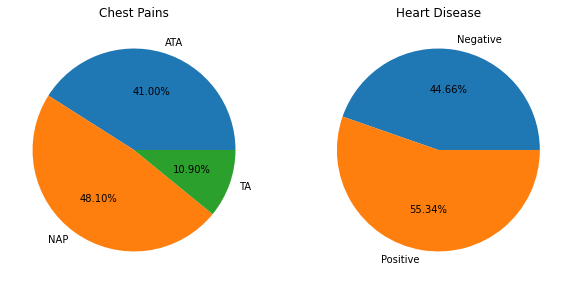

In [2]:
import matplotlib.pyplot as plt

chest_pains = [df.loc[df['ChestPainType_ATA'] == 1]['ChestPainType_ATA'].sum(),
               df.loc[df['ChestPainType_NAP'] == 1]['ChestPainType_NAP'].sum(),
               df.loc[df['ChestPainType_TA'] == 1]['ChestPainType_TA'].sum()
               ]

heart_disease = [len(df.loc[df['HeartDisease'] == 0].index),
                 df.loc[df['HeartDisease'] == 1]['HeartDisease'].sum()
                 ]

fig, axs = plt.subplots(1, 2, figsize=(10,10))
axs[0].pie(chest_pains, labels=['ATA', 'NAP', 'TA'], autopct='%2.2f%%')
axs[0].set_title('Chest Pains')
axs[1].pie(heart_disease, labels=['Negative', 'Positive'], autopct='%2.2f%%')
axs[1].set_title('Heart Disease')
plt.show()

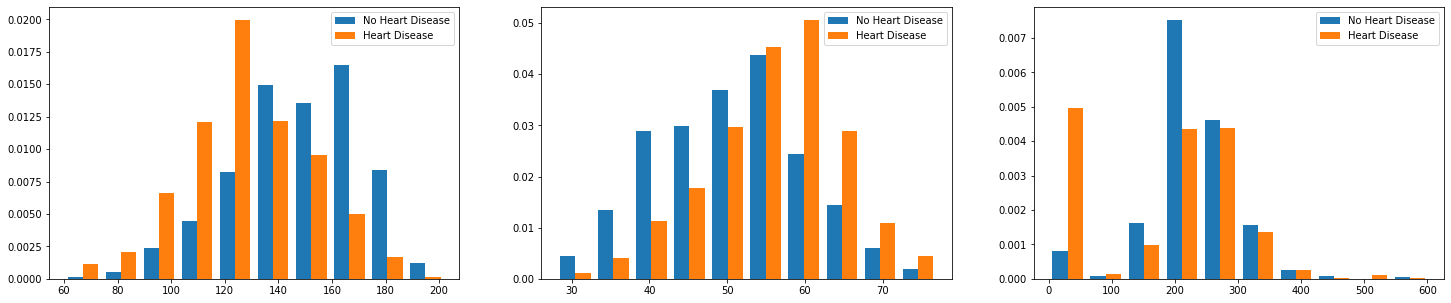

In [3]:
hdvmaxhr_data = [df.loc[df['HeartDisease'] == i]['MaxHR'].to_numpy() for i in range(df['HeartDisease'].nunique())]
hdvage_data = [df.loc[df['HeartDisease'] == i]['Age'].to_numpy() for i in range(df['HeartDisease'].nunique())]
hdvc_data = [df.loc[df['HeartDisease'] == i]['Cholesterol'].to_numpy() for i in range(df['HeartDisease'].nunique())]

fig, axs = plt.subplots(1, 3, figsize=(25, 5))

axs[0].hist(hdvmaxhr_data, bins=10, density=True, label=['No Heart Disease', 'Heart Disease'])
axs[0].legend()

axs[1].hist(hdvage_data, bins=10, density=True, label=['No Heart Disease', 'Heart Disease'])
axs[1].legend()

axs[2].hist(hdvc_data, bins=10, density=True, label=['No Heart Disease', 'Heart Disease'])
axs[2].legend()
plt.show()

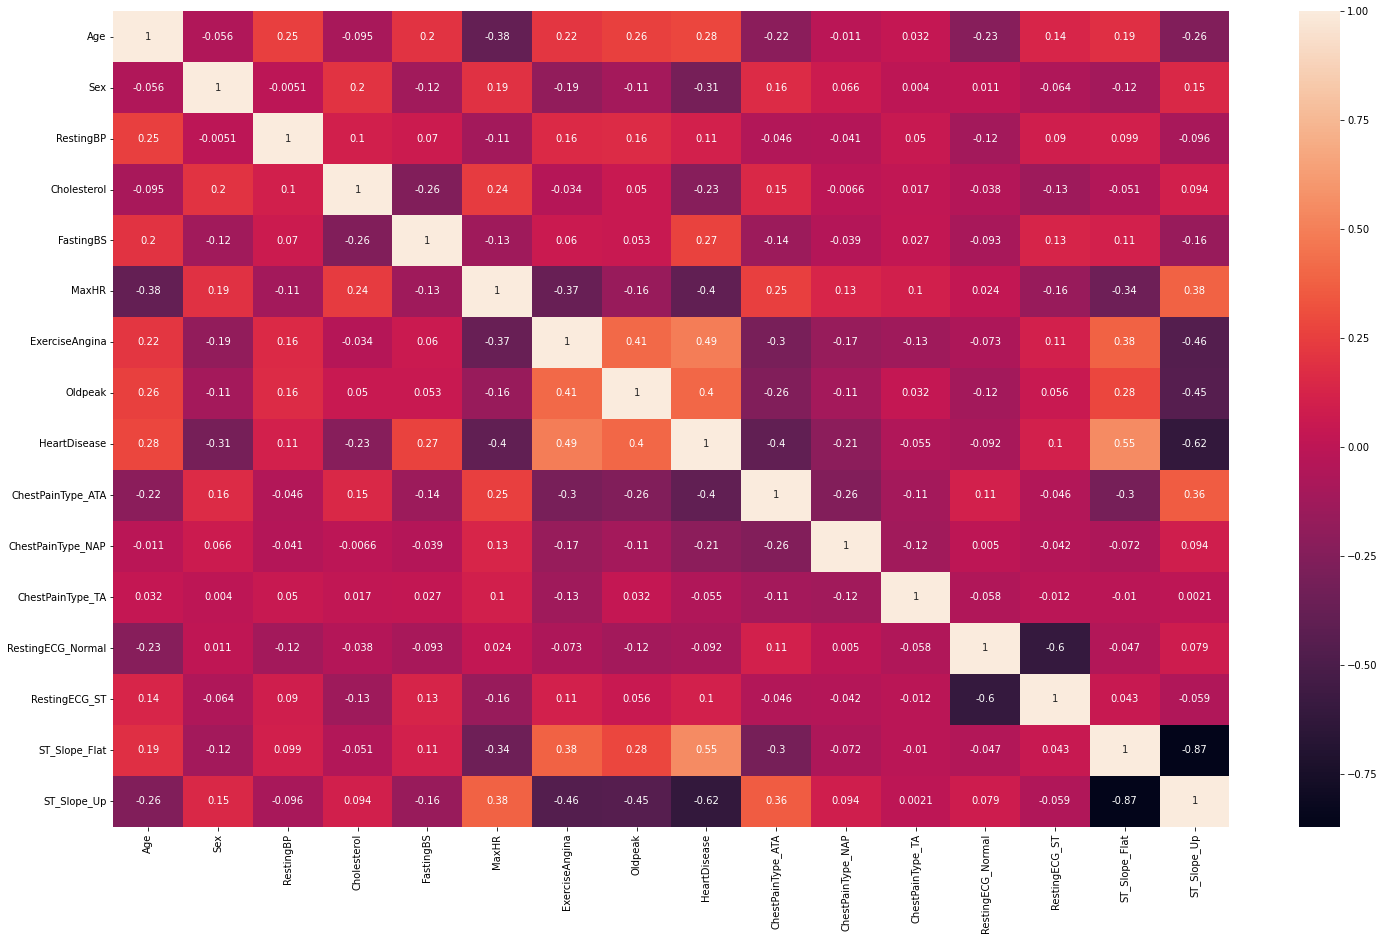

In [4]:
import seaborn as sns

plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [5]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

temp_df = df

Y = temp_df.pop('HeartDisease')
cols = temp_df.columns
X = pd.DataFrame(scale(temp_df))
X.columns = cols

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=1)

Training Accuracy: 90.84%
Testing Accuracy: 87.39%


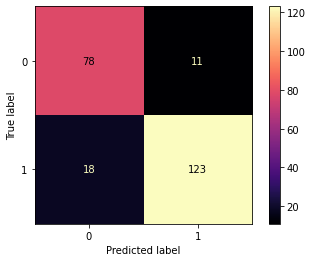

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay

clf = DecisionTreeClassifier(max_depth=5).fit(X_train, Y_train)
print('Training Accuracy: {:3.2f}%'.format(clf.score(X_train, Y_train) * 100))
print('Testing Accuracy: {:3.2f}%'.format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()

Training Accuracy: 91.56976744186046%
Testing Accuracy: 89.56521739130436%


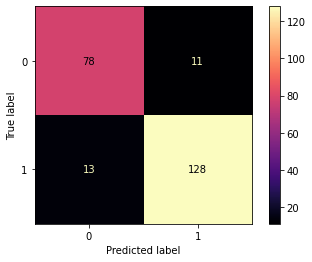

In [7]:
from sklearn.svm import SVC

clf = SVC().fit(X_train, Y_train)
print('Training Accuracy: {:3.2f}%'.format(clf.score(X_train, Y_train) * 100))
print('Testing Accuracy: {:3.2f}%'.format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()

Training Accuracy: 100.0%
Testing Accuracy: 86.95652173913044%


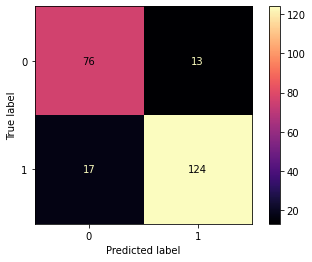

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier().fit(X_train, Y_train)
print('Training Accuracy: {:3.2f}%'.format(clf.score(X_train, Y_train) * 100))
print('Testing Accuracy: {:3.2f}%'.format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()

Training Accuracy: 93.46%
Testing Accuracy: 88.26%


/home/matt/StudentMathScores/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


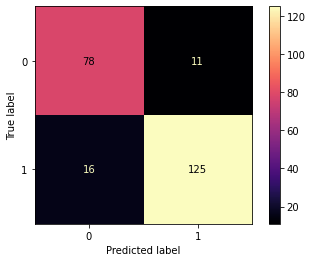

In [15]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=200).fit(X_train, Y_train)
print('Training Accuracy: {:3.2f}%'.format(clf.score(X_train, Y_train) * 100))
print('Testing Accuracy: {:3.2f}%'.format(clf.score(X_test, Y_test) * 100))
ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test, cmap='magma')
plt.show()